<img src="files/john_holland.jpg" alt="John Holland, inventor de los algoritmos genéticos" style="width: 300px;"/>

$$John \, H. \, Holland \, (1929 - 2015)$$

> *I have more ideas than I can ever follow up on in a lifetime, so I never worry if someone steals an idea from me*. 

>Físico y matemático

>Profesor de Ciencias de la Computación, Ingeniería Eléctrica y Psicología (sí, Psicología)

>Padre del algoritmo genético y pionero de los sistemas complejos adaptativos

In [10]:
from IPython.core.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

#Resolución directa de problemas

Normalmente, cuando tenemos un problema intentamos resolverlo directamente. Es decir, a partir de las premisas del problema, aplicamos un método que nos ofrece una solución que cumpla las premisas y nos quedamos a gusto. 

$$PROBLEM - \underline{method} \, -> SOLUTION$$

Muchos de los problemas que intentamos resolver (por no decir todos) son problemas de optimización. Un problema de optimización es aquel en el que intentamos minimizar o maximizar el valor de algo. Por ejemplo: ¿qué carrocería ofrece menos resistencia aerodinámica? ¿en qué momentos debo comprar y vender para maximizar mi beneficio en este mercado bursátil? ¿qué regalo le gustará más a mi novia?

Imaginemos que queremos optimizar la cantidad de sueño que disfrutamos cada noche y que conocemos la función del descanso con el tiempo de sueño (en horas):

$$Descanso = \frac{1}{2200} \cdot (tiempo^3 - 50 \cdot tiempo ^2 + 600 \cdot tiempo)$$

In [2]:
num_hora = 20
horas = np.linspace(0, 12, num_hora*12+1)
descanso = [(tiempo**3 - 50*tiempo**2 + 600*tiempo)/2200 for tiempo in horas]

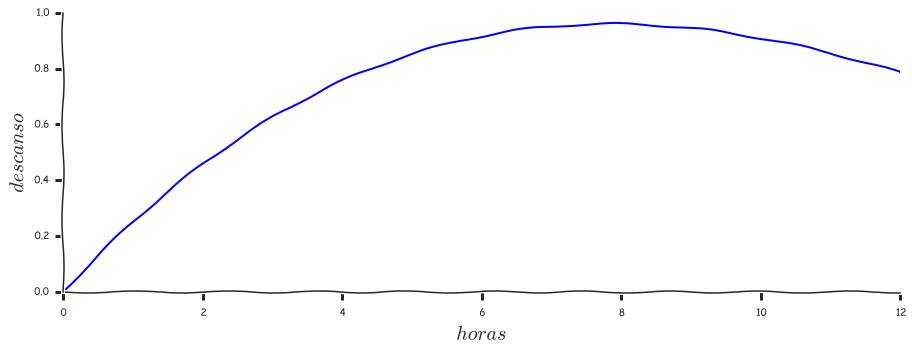

In [3]:
with plt.xkcd():
    plt.figure(figsize=(15, 5))
    plt.plot(horas, descanso)
    plt.xlabel("$horas$", fontsize=20)
    plt.ylabel("$descanso$", fontsize=20)
    sns.despine()

La teoría de la optimización nos dice que debemos derivar esta función e igualar el resultado a 0 para calcular el máximo local. Obtenemos:

$$\frac {d}{d t}(Descanso) = \frac{1}{2200} \cdot (3 \cdot tiempo^2 - 100 \cdot tiempo + 600) = 0$$

Aplicando el método de resolución de ecuaciones cuadráticas:

$$ tiempo_{max} = \frac {100 - \sqrt {100^2 - 4 \cdot 3 \cdot 600}}{2 \cdot 3} = 7.85 \, h $$

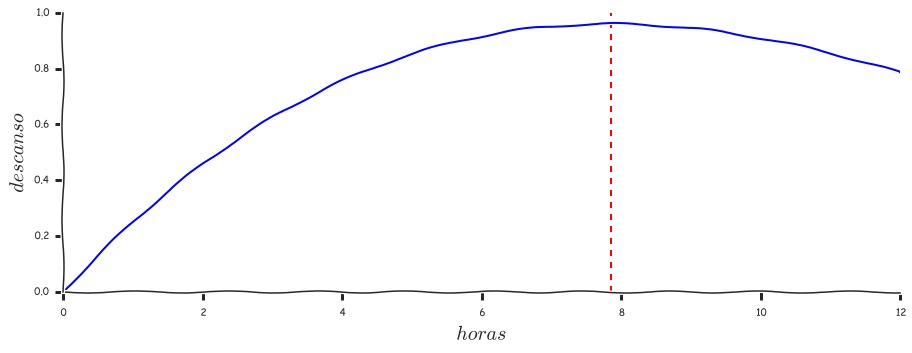

In [4]:
hora_max = 7.85
with plt.xkcd():
    plt.figure(figsize=(15, 5))
    plt.plot(horas, descanso)
    plt.vlines(hora_max, 0, 1, colors = 'r' ,linestyles = 'dashed')
    plt.xlabel("$horas$", fontsize=20)
    plt.ylabel("$descanso$", fontsize=20)
    sns.despine()


#Resolución de problemas mediante métodos heurísticos

Muchas veces no contamos con un método de resolución directo. A veces no sabemos de qué relaciones depende el problema o el sistema de ecuaciones que lo gobierna es trascendental (es decir, no tiene solución), como las ecuaciones de Navier-Stokes. Muchas veces, las funciones de las que depende el problema simplemente no son derivables o es muy complicado derivarlas. En todos estos casos hay que recurrir a un método heurístico para tratar de resolver el problema:

$$proposed \, solution - \underline{PROBLEM} \, -> evaluation$$
$$proposed \, solution - \underline{PROBLEM} \, -> evaluation$$
$$proposed \, solution - \underline{PROBLEM} \, -> evaluation$$
$$...$$

Veamos, por ejemplo, cómo se complica el problema anterior añadiendo algunas consideraciones adicionales. Se ha demostrado que el sueño no es un proceso continuo, sino que pasa por una serie de ciclos de unos 90 minutos, en los que el nivel alerta evoluciona siguiendo un patrón típico como el siguiente:

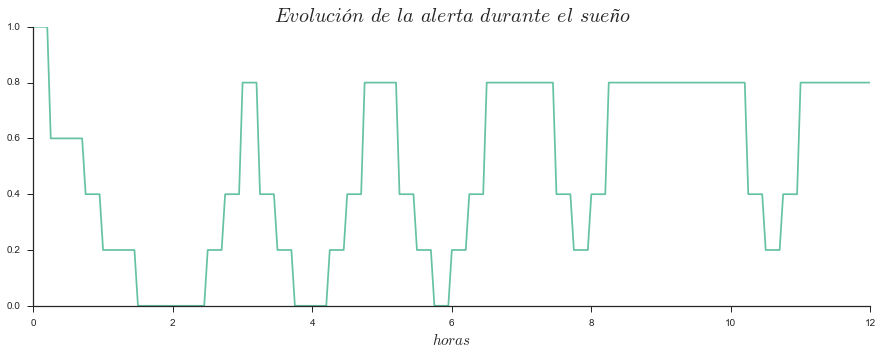

In [5]:
vigilia = []
vigilia += 5 * [1]
vigilia += 10 * [0.6] 
vigilia += 5 * [0.4] 
vigilia += 10 * [0.2] 
vigilia += 20 * [0] 
vigilia += 5 * [0.2] 
vigilia += 5 * [0.4] 
vigilia += 5 * [0.8] 
vigilia += 5 * [0.4] 
vigilia += 5 * [0.2] 
vigilia += 10 * [0] 
vigilia += 5 * [0.2]
vigilia += 5 * [0.4] 
vigilia += 10 * [0.8] 
vigilia += 5 * [0.4] 
vigilia += 5 * [0.2] 
vigilia += 5 * [0] 
vigilia += 5 * [0.2]
vigilia += 5 * [0.4] 
vigilia += 20 * [0.8] 
vigilia += 5 * [0.4] 
vigilia += 5 * [0.2] 
vigilia += 5 * [0.4] 
vigilia += 40 * [0.8] 
vigilia += 5 * [0.4] 
vigilia += 5 * [0.2] 
vigilia += 5 * [0.4]
vigilia += 21 * [0.8]

plt.figure(figsize=(15,5))
plt.plot(horas, vigilia)
plt.title('$Evolución \, de \, la \, alerta \, durante \, el \, sueño$', fontsize=20)
plt.xlabel("$horas$", fontsize=15)
sns.despine()

Naturalmente, es más fácil despertar cuando el nivel de alerta es más alto y además la sensación de descanso es mayor. En cambio, si se fuerza el despertar (por ejemplo mediante un despertador) en un momento del ciclo en el que el sueño es muy profundo, nos despertamos abotargados y cansados. La evolución del descanso seguirá una evolución como la siguiente:

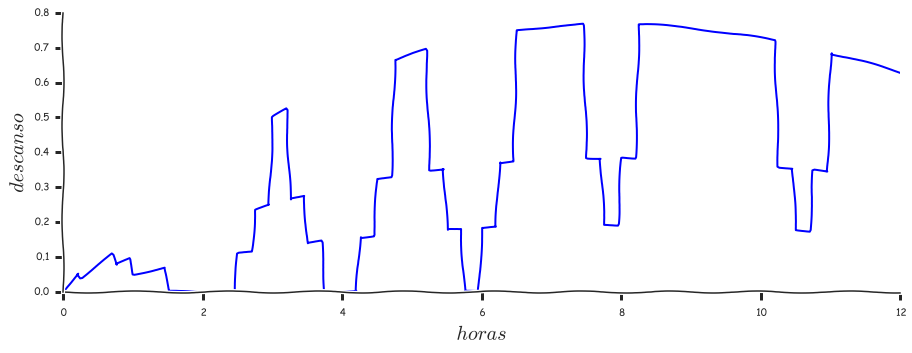

In [6]:
descanso_ciclos = list(np.array(vigilia)*np.array(descanso))
with plt.xkcd():
    plt.figure(figsize=(15,5))
    plt.plot(horas, descanso_ciclos)
    plt.xlabel("$horas$", fontsize=20)
    plt.ylabel("$descanso$", fontsize=20)
    sns.despine()

Esta función ni siquiera es derivable, ¿cómo podemos encontrar el óptimo? Un método heurístico muy sencillo consistiría en muestrear la función con un nivel de precisión suficiente y escoger el punto que se corresponda con el nivel de descanso más alto:

In [7]:
data = {
    'Tiempo de descanso (horas)' : horas,
    'Nivel de descanso' : descanso_ciclos
}

catalogue = pd.DataFrame(data, 
                         columns = ['Tiempo de descanso (horas)',  'Nivel de descanso' ], 
                         index = ['Muestra ' + str(i) for i in range(1, len(descanso_ciclos)+1)]
                        )
catalogue

,Tiempo de descanso (horas),Nivel de descanso
Muestra 1,0.00,0.000000
Muestra 2,0.05,0.013580
Muestra 3,0.10,0.027046
Muestra 4,0.15,0.040399
Muestra 5,0.20,0.053640
Muestra 6,0.25,0.040061
Muestra 7,0.30,0.047871
Muestra 8,0.35,0.055614
Muestra 9,0.40,0.063290
Muestra 10,0.45,0.070900


El óptimo resulta ser:

In [8]:
index_max = descanso_ciclos.index(max(descanso_ciclos))
hora_max = horas[index_max]
catalogue[index_max : index_max+1]

,Tiempo de descanso (horas),Nivel de descanso
Muestra 166,8.25,0.766688


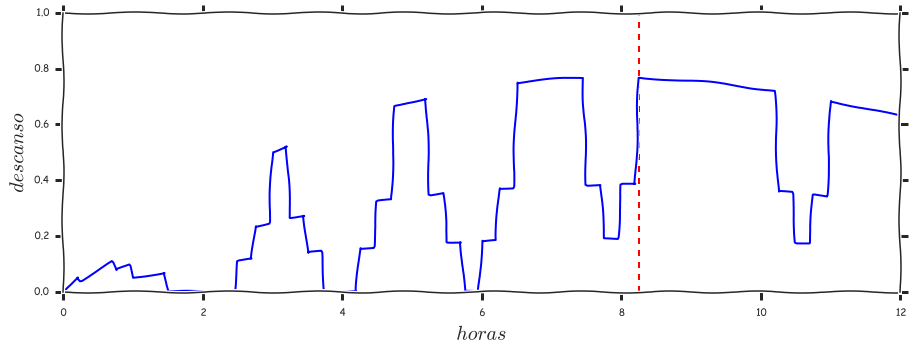

In [9]:
descanso_ciclos = list(np.array(vigilia)*np.array(descanso))
with plt.xkcd():
    plt.figure(figsize=(15,5))
    plt.plot(horas, descanso_ciclos)
    plt.xlabel("$horas$", fontsize=20)
    plt.ylabel("$descanso$", fontsize=20)
    plt.vlines(hora_max, 0, 1, colors = 'r' ,linestyles = 'dashed')

Este es un método heurístico muy sencillo y muy eficaz, pero no es muy eficiente. Para obtener un óptimo con la precisión deseada hemos evaluado 241 muestras, de las que hemos retenida sólo una. Es decir, **hemos desechado el 99,6 % de las soluciones propuestas**.

Este método es apropiado para un problema sencillo como éste.  Sin embargo, cuando el espacio de soluciones es muy amplio o cuando la evaluación de la solución propuesta es difícil, los tiempos de cálculo se vuelven inaceptables y es necesario recurrir a métodos heurísticos más inteligentes, como el algoritmo genético.

#¿Qué es un algoritmo genético?

Es habitual, en el proceso de diseño o de optimización encontrarse con:

* Ecuaciones no derivables (o que nos da pereza derivar)
* Sistemas de ecuaciones trascendentales (o que no sabemos resolver)
* Relaciones que desconocemos (o que no comprendemos)
* Múltiples factores que interactúan simultáneamente
* Condiciones cambiantes
* ...

Y entonces surgen preguntas como las siguientes:

* ¿Cómo resolver *fácilmente* un problema que con una formulación complicada?
* ¿Cómo evaluar una solución cuándo queremos optimizar varios factores al mismo tiempo?
* ¿Cómo solucionar un problema cuyas condiciones evolucionan todo el tiempo?


Por muy complicado que nos parezcan, hasta los seres vivos más primitivos llevan resolviendo problemas como estos desde *siempre*. La supervivencia es un problema complejo, donde intervienen una cantidad inconmensurable de factores que no se sabe muy bien cómo interactúan entre sí y que, para colmo, cambian geográficamente y evolucionan rápidamente a lo largo del tiempo.

Los algoritmos evolutivos nacen de una analogía entre la optimización y la selección natural.

>*My own idiosyncratic view is that the reason scientists burn out early is that they dig very deep in one area and they’ve gone as far as its humanly possible at that time and then they can’t easily cross over into other areas. 
I think at the heart of most creative science are well thought-out metaphors, and cross-disciplinary work is a rich source of metaphor*. John Henry Holland

Miremos alrededor y veamos la biodiversidad del mundo. Tenemos seres humanos, enormes elefantes herbívoros, feroces tigres, mansos perritos, minúsculas e industriosas hormigas, árboles grandes y pequeños, setas de colores, peces y mamíferos marinos, bacterias y viruses...

**Soluciones diferentes para el mismo problema: ¿cómo hay que ser para reproducirse lo más posible?**

¿Cómo podemos emular a la selección natural para resolver un problema de diseño? Veámoslo con un ejemplo.

#Ejemplo

In [216]:
class Individual (object):
    
    def __init__(self, genome):
        
        self.genome = genome        
        self.traits = {}
        self.performances = {}
        self.fitness = 0

In [378]:
dict_genes = {
    'Pareja de Pedro' : 3,
    'Pareja de Mariano' : 3,
    'Pareja de Antonio' : 3
}

In [315]:
generate_random_binary_list = lambda n: [random.randint(0,1) for b in range(1,n+1)]

def generate_genome (dict_genes):
    
    #We first calculate the total number of bits that the genome must contain
    number_of_bits = sum([dict_genes[trait] for trait in dict_genes])
    
    #And we return a random genome of this length
    return generate_random_binary_list(number_of_bits)

In [382]:
def calculate_traits (individual, dict_genes):
    #This function must decipher the genome and return the traits of the individual.
    #Normally, the genome contains binary numerical values for the different traits.
    
    dict_traits = {}
    index = 0
    
    for trait in dict_genes:
        dict_traits[trait] = int(''.join(str(bit) for bit in individual.genome[index : index+dict_genes[trait]]), 2)
        index += dict_genes[trait]
        
    individual.traits = dict_traits

In [403]:
individuo = Individual(generate_genome(dict_genes))
calculate_traits (individuo, dict_genes)
individuo.traits

{'Pareja de Antonio': 1, 'Pareja de Mariano': 4, 'Pareja de Pedro': 2}

In [345]:
def calculate_performances (individual):

SyntaxError: unexpected EOF while parsing (<ipython-input-345-c7013848f697>, line 1)

In [350]:
def calculate_fitness (individual):

SyntaxError: unexpected EOF while parsing (<ipython-input-350-36a0fe0d25ad>, line 1)

In [92]:
def immigration (society, target_population, dict_genes):
    
    while len(society) < target_population:
        society.append ( Individual (generate_genome (dict_genes)))

In [283]:
weights = [0.9, 0.05, 0.05]
N = 100000
lista = [weighted_choice_sub(weights) for ii in range(N)]
print( lista.count(0)/N, lista.count(1)/N, lista.count(2)/N)

0.89933 0.05009 0.05058


In [153]:
#This function was taken from Eli Bendersky's website
#It returns an index of a list called "weights", 
#where the content of each element in "weights" is the probability of this index to be returned.
#For this function to be as fast as possible we need to pass it a list of weights in descending order.
def weighted_choice_sub(weights):
    rnd = random.random() * sum(weights)
    for i, w in enumerate(weights):
        rnd -= w
        if rnd < 0:
            return i

def crossover (society, reproduction_rate, mutation_rate):
    
    #First we create a list with the fitness values of every individual in the society
    fitness_list = [individual.fitness for individual in society]
    
    #We sort the individuals in the society in descending order of fitness.   
    society = [x for (y, x) in sorted(zip(fitness_list, society), key=lambda x: x[0], reverse=True)] 
    
    #We then create a list of relative probabilities in descending order, 
    #so that the fittest individual in the society has N times more chances to reproduce than the least fit,
    #where N is the number of individuals in the society.
    probability = [i for i in reversed(range(1,len(society)+1))]
    
    #We create a list of weights with the probabilities of non-mutation and mutation
    mutation = [1 - mutation_rate, mutation_rate]    
    
    #For every new individual to be created through reproduction:
    for i in range (int(len(society) * reproduction_rate)):
        
        #We select two parents randomly, using the list of probabilities in "probability".
        father, mother = society[weighted_choice_sub(probability)], society[weighted_choice_sub(probability)]
        
        #We randomly select two cutting points for the genome.
        a, b = random.randrange(0, len(father.genome)), random.randrange(0, len(father.genome))
        
        #And we create the genome of the child putting together the genome slices of the parents in the cutting points.
        child_genome = father.genome[0:min(a,b)]+mother.genome[min(a,b):max(a,b)]+father.genome[max(a,b):]
        
        #For every bit in the not-yet-born child, we generate a list containing 
        #1's in the positions where the genome must mutate (i.e. the bit must switch its value)
        #and 0's in the positions where the genome must stay the same.
        n = [weighted_choice_sub(mutation) for ii in range(len(child_genome))]
        
        #This line switches the bits of the genome of the child that must mutate.
        mutant_child_genome = [abs(n[i] -  child_genome[i]) for i in range(len(child_genome))]
        
        #We finally append the newborn individual to the society
        society.append(Individual(mutant_child_genome))
        
    return (society)

In [217]:
def tournament(society, target_population):
    
    while len(society) > target_population:
        
        index1, index2 = random.randrange(0, len(society)), random.randrange(0, len(society))
        
        if society[index1].fitness > society[index2].fitness:
            society.pop(index2)
        else:
            society.pop(index1)